Geração 1: Melhor custo = 755.51
Geração 2: Melhor custo = 717.52
Geração 3: Melhor custo = 668.27
Geração 4: Melhor custo = 638.80
Geração 5: Melhor custo = 601.41
Geração 6: Melhor custo = 584.21
Geração 7: Melhor custo = 577.11
Geração 8: Melhor custo = 554.09
Geração 9: Melhor custo = 547.52
Geração 10: Melhor custo = 516.65
Geração 11: Melhor custo = 516.65
Geração 12: Melhor custo = 516.65
Geração 13: Melhor custo = 510.24
Geração 14: Melhor custo = 496.14
Geração 15: Melhor custo = 496.14
Geração 16: Melhor custo = 489.73
Geração 17: Melhor custo = 489.73
Geração 18: Melhor custo = 489.73
Geração 19: Melhor custo = 489.73
Geração 20: Melhor custo = 489.73
Geração 21: Melhor custo = 480.12
Geração 22: Melhor custo = 480.12
Geração 23: Melhor custo = 480.12
Geração 24: Melhor custo = 480.12
Geração 25: Melhor custo = 480.12
Geração 26: Melhor custo = 475.43
Geração 27: Melhor custo = 475.43
Geração 28: Melhor custo = 475.43
Geração 29: Melhor custo = 475.43
Geração 30: Melhor cust

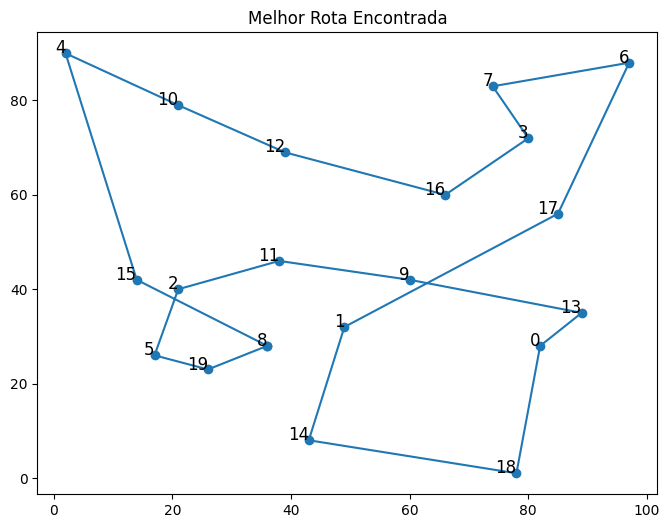

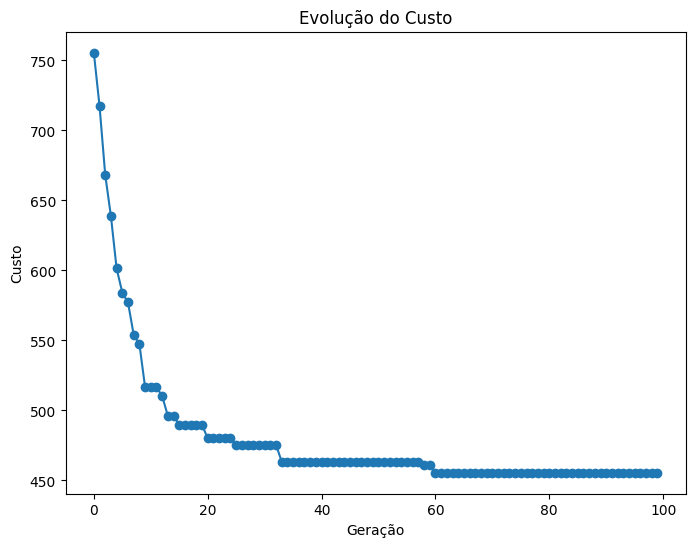

In [ ]:
# Importando bibliotecas necessárias
import numpy as np
import random
import matplotlib.pyplot as plt

# Gerar coordenadas de cidades aleatórias
def gerar_cidades(num_cidades, limite=100):
    return np.random.randint(0, limite, size=(num_cidades, 2))

# Calcular a distância entre duas cidades
def calcular_distancia(cidade1, cidade2):
    return np.linalg.norm(cidade1 - cidade2)

# Calcular a distância total de uma rota
def calcular_custo_rota(cidades, rota):
    return sum(calcular_distancia(cidades[rota[i]], cidades[rota[i + 1]]) for i in range(len(rota) - 1))

# Criar população inicial de rotas
def criar_populacao(cidades, tamanho_pop):
    num_cidades = len(cidades)
    return [random.sample(range(num_cidades), num_cidades) for _ in range(tamanho_pop)]

# Função de seleção (torneio)
def selecionar_pais(populacao, cidades):
    torneio = random.sample(populacao, k=5)
    return min(torneio, key=lambda rota: calcular_custo_rota(cidades, rota))

# Operador de crossover (ordem)
def crossover(pai1, pai2):
    corte1, corte2 = sorted(random.sample(range(len(pai1)), 2))
    filho = [None] * len(pai1)
    filho[corte1:corte2] = pai1[corte1:corte2]
    preenchidos = set(filho[corte1:corte2])
    pos = 0
    for gene in pai2:
        if gene not in preenchidos:
            while filho[pos] is not None:
                pos += 1
            filho[pos] = gene
    return filho

# Operador de mutação (swap)
def mutacao(rota, taxa_mutacao):
    if random.random() < taxa_mutacao:
        i, j = random.sample(range(len(rota)), 2)
        rota[i], rota[j] = rota[j], rota[i]

# Algoritmo Genético
def algoritmo_genetico(cidades, geracoes, tamanho_pop, taxa_mutacao):
    populacao = criar_populacao(cidades, tamanho_pop)
    historico_custos = []

    for geracao in range(geracoes):
        nova_populacao = []
        for _ in range(tamanho_pop):
            pai1 = selecionar_pais(populacao, cidades)
            pai2 = selecionar_pais(populacao, cidades)
            filho = crossover(pai1, pai2)
            mutacao(filho, taxa_mutacao)
            nova_populacao.append(filho)
        populacao = nova_populacao
        melhor_rota = min(populacao, key=lambda rota: calcular_custo_rota(cidades, rota))
        melhor_custo = calcular_custo_rota(cidades, melhor_rota)
        historico_custos.append(melhor_custo)
        print(f"Geração {geracao + 1}: Melhor custo = {melhor_custo:.2f}")

    return melhor_rota, historico_custos

# Visualização do progresso
def plotar_rota(cidades, rota):
    rota_coordenadas = cidades[rota + [rota[0]]]
    plt.figure(figsize=(8, 6))
    plt.plot(rota_coordenadas[:, 0], rota_coordenadas[:, 1], marker='o')
    for i, (x, y) in enumerate(cidades):
        plt.text(x, y, str(i), fontsize=12, ha='right')
    plt.title("Melhor Rota Encontrada")
    plt.show()

def plotar_custos(historico_custos):
    plt.figure(figsize=(8, 6))
    plt.plot(historico_custos, marker='o')
    plt.title("Evolução do Custo")
    plt.xlabel("Geração")
    plt.ylabel("Custo")
    plt.show()

# Configurações do problema
NUM_CIDADES = 20
GERACOES = 100
TAMANHO_POP = 50
TAXA_MUTACAO = 0.2

# Executando o algoritmo genético
cidades = gerar_cidades(NUM_CIDADES)
melhor_rota, historico_custos = algoritmo_genetico(cidades, GERACOES, TAMANHO_POP, TAXA_MUTACAO)

# Visualizando os resultados
plotar_rota(cidades, melhor_rota)
plotar_custos(historico_custos)
